In [1]:
x<-c(15.58, 15.9, 16, 16.1, 16.2)
p1<-c(0.15, 0.21, 0.35, 0.15, 0.14)
p2<-c(0.14, 0.05, 0.64, 0.08, 0.09)

E<-function(y, Py){
    sum(y*Py)
}
Var<-function(y, Py){
    sum(Py*(y^2))-(E(y,Py))^2
}

cat("Exercise 1")
cat("\nMean Values \nFirst method: ", E(x, p1), "\nSecond method: ", E(x, p2), "\n")
cat("\nVariances \nFirst method: ", Var(x, p1), "\nSecond method: ", Var(x, p2))



Exercise 1
Mean Values 
First method:  15.959 
Second method:  15.9622 

Variances 
First method:  0.033979 
Second method:  0.02816716

Exercise 2

Question B
Probability that a person will wait for less than 10 minutes: 0.2834687 

Question C
Average waiting time from the simulated data in minutes: 27.39241 
Theoretical expected value of the average waiting time: 30
Expected value of the average waiting time calculated by manipulating the probability distribution using R: 29.99719 

Question D
Probability for waiting more than one hour before being received: 0.1353353

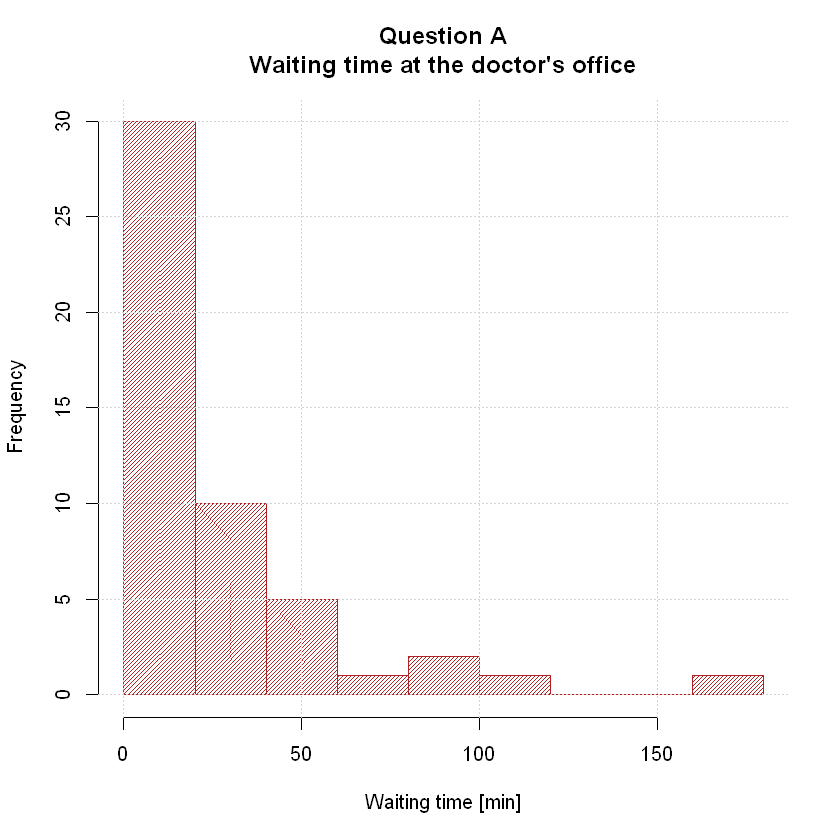

In [42]:
cat("Exercise 2\n")
x<-1:50
dist<-rexp(x, 1/30)


cat("\nQuestion B\nProbability that a person will wait for less than 10 minutes:", pexp(10, 1/30), "\n")

cat("\nQuestion C\nAverage waiting time from the simulated data in minutes:", mean(dist), "\n")

E<-sum(seq(0, 500, 1)*dexp(seq(0, 500, 1), 1/30))
cat("Theoretical expected value of the average waiting time:", 30)
cat("\nExpected value of the average waiting time calculated by manipulating the probability distribution using R:", E, "\n")

cat("\nQuestion D\nProbability for waiting more than one hour before being received:", 1-pexp(60, 1/30))

hist(dist, col="firebrick", xlab="Waiting time [min]", ylim=c(0, 30), density=45, main = "Question A\nWaiting time at the doctor's office")
grid()

Exercise 3

Probability that there is at least one error on a specific page of the book: 0.2834687

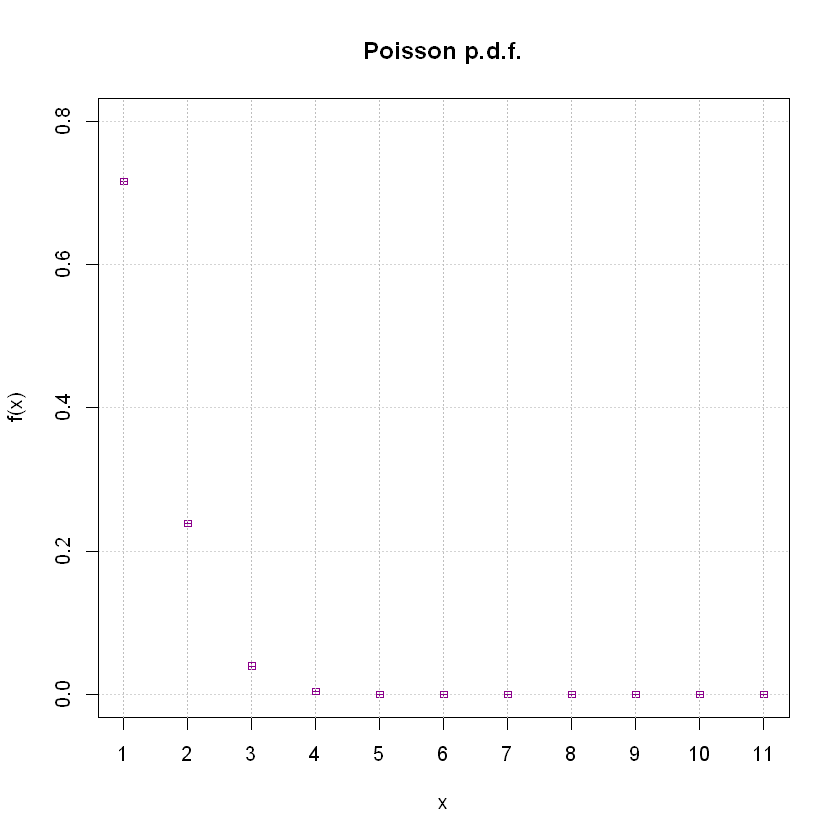

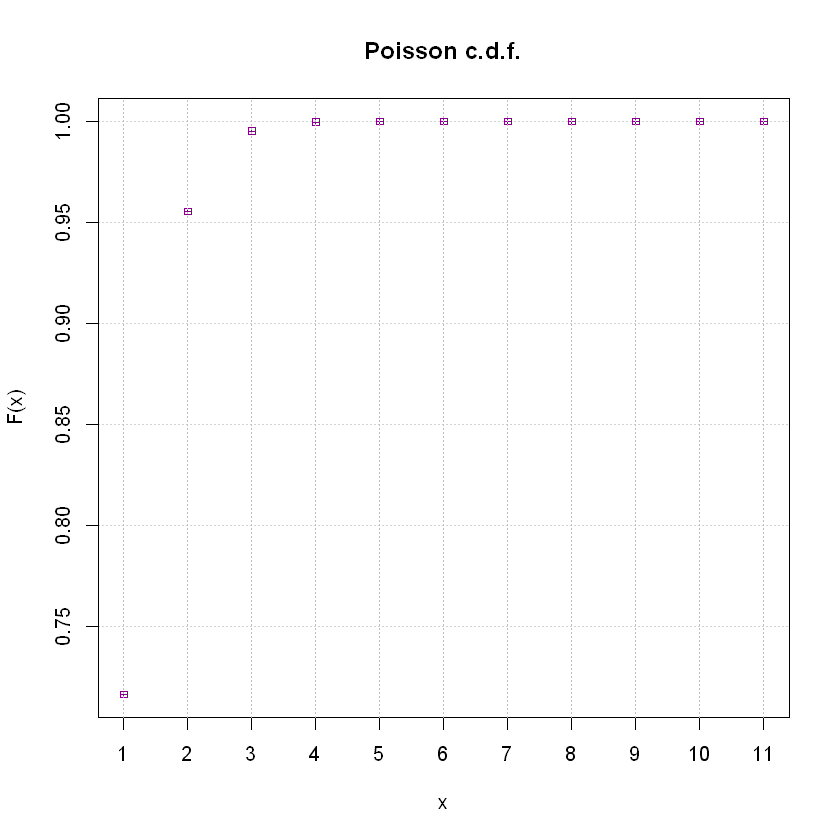

In [3]:
cat("Exercise 3\n")
x<-0:10
cat("\nProbability that there is at least one error on a specific page of the book:", 1-dpois(0, 1/3))

plot(dpois(x, 1/3), col="magenta4", xlab="x", ylab="f(x)", pch=12, cex=0.7, 
     main = "Poisson p.d.f.", ylim=range(pretty(c(0, dpois(x, 1/3)))),  panel.first=grid())
axis(1, seq(0, length(x), 1))
abline(h=NULL, v=1:length(x), col="gray", lty=3)

plot(ppois(x, 1/3), col="magenta4", xlab="x", ylab="F(x)", pch=12, cex=0.7, 
     main = "Poisson c.d.f.",  panel.first=grid())
axis(1, seq(0, length(x), 1))
abline(h=NULL, v=1:length(x), col="gray", lty=3)



In [4]:
cat("Exercise 4\n")
p<-4/52
cat("\nProbability that at least 10 draws are needed until one ace is drawn:", 1-sum(dgeom(0:8,p)))

Exercise 4

Probability that at least 10 draws are needed until one ace is drawn: 0.4865652

Exercise 5

Question A
The constant c is equal to 6 

Question C
Probability that the student will finish the aptitude test in more than 75 minutes:

[1] 0.84375


Probability that the student will finish the aptitude test in 90 minutes:

[1] 0.5


Probability that the student will finish the aptitude test in 120 minutes:

[1] 1


Question B


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


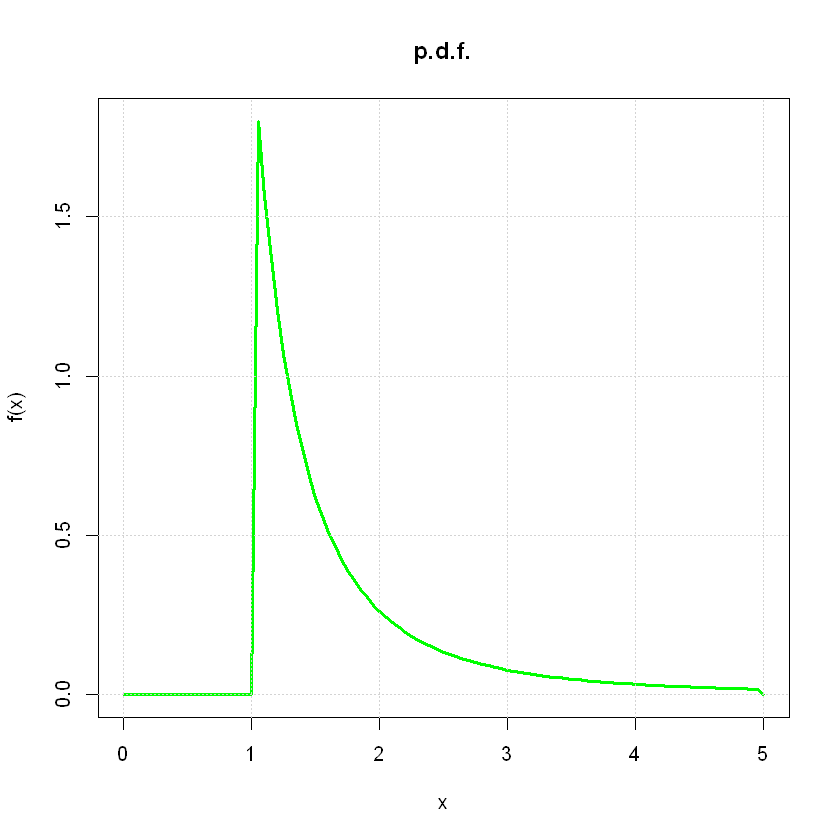

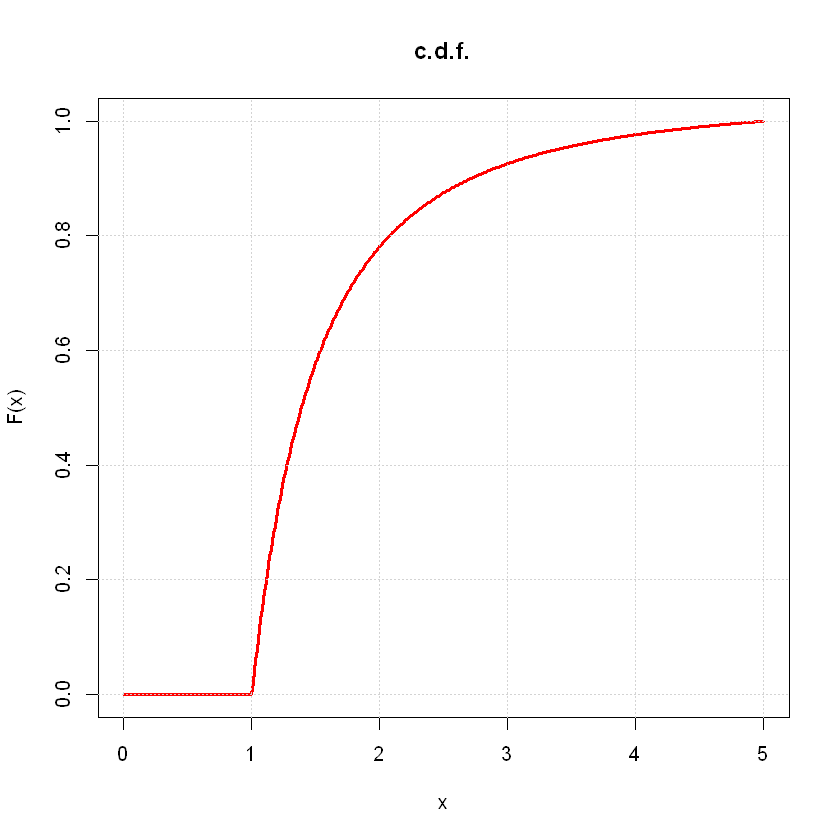

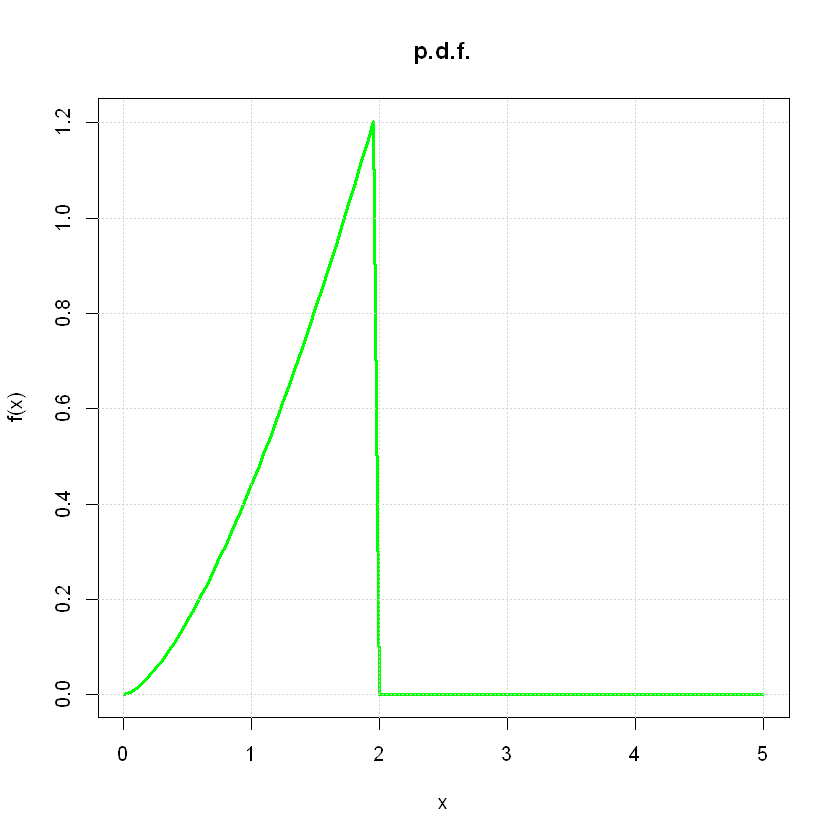

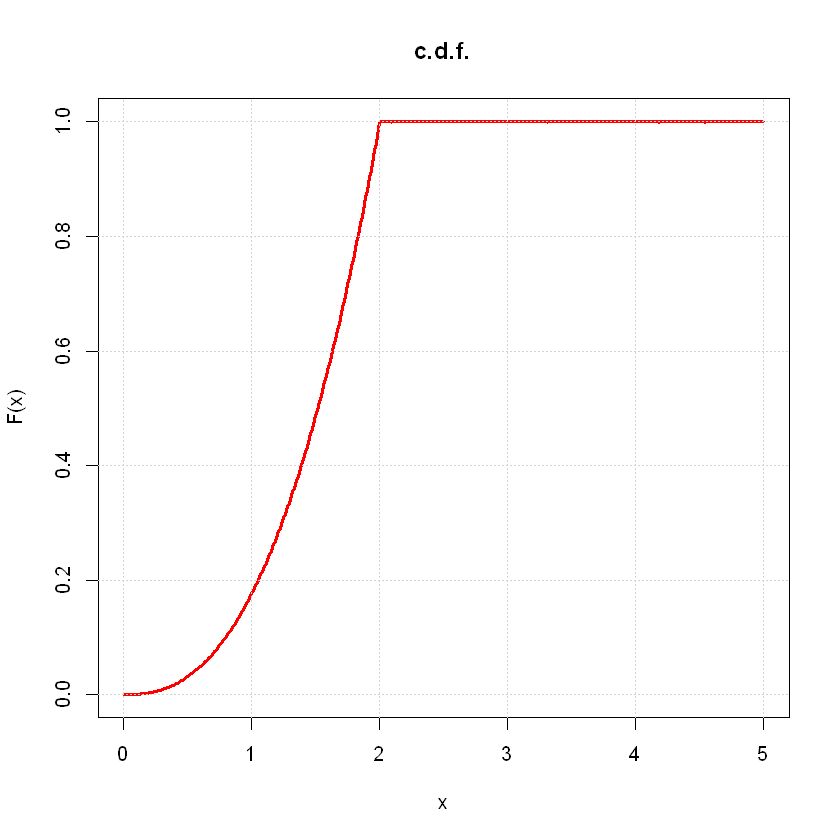

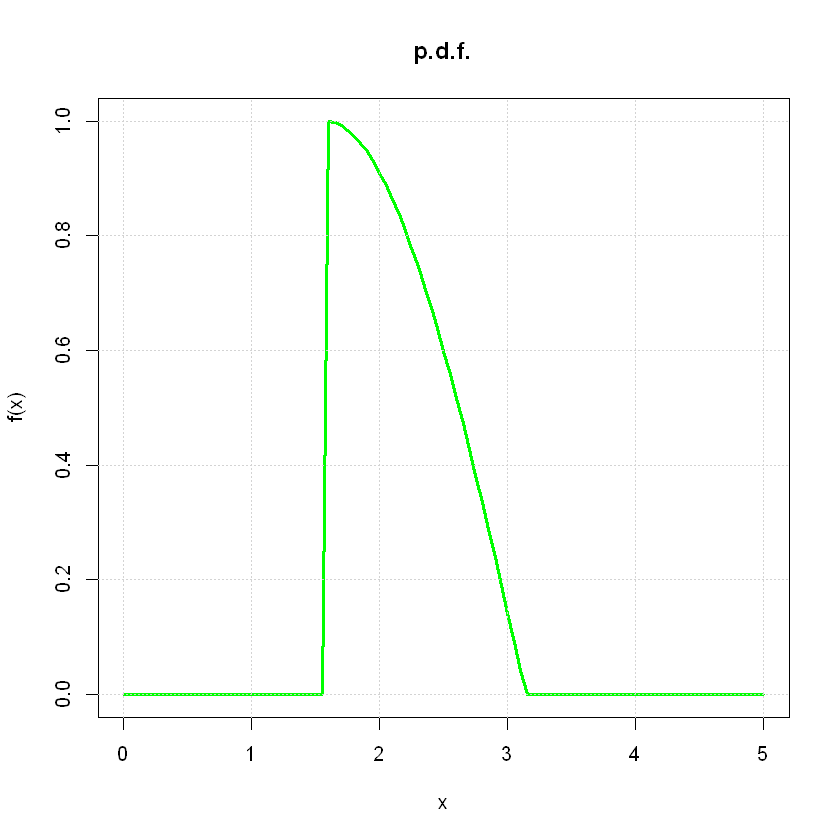

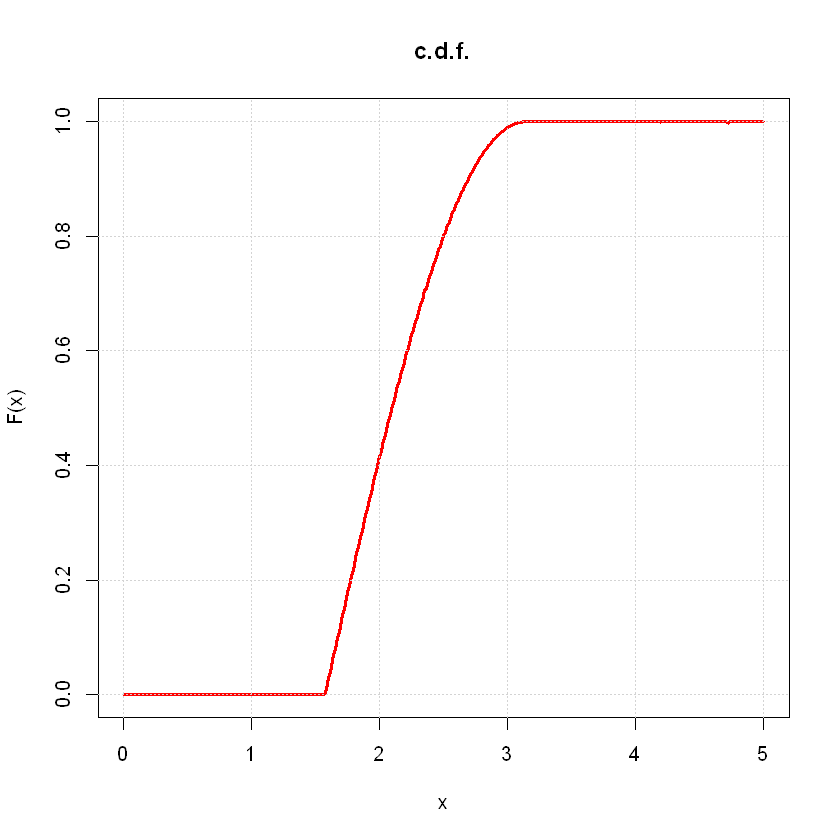

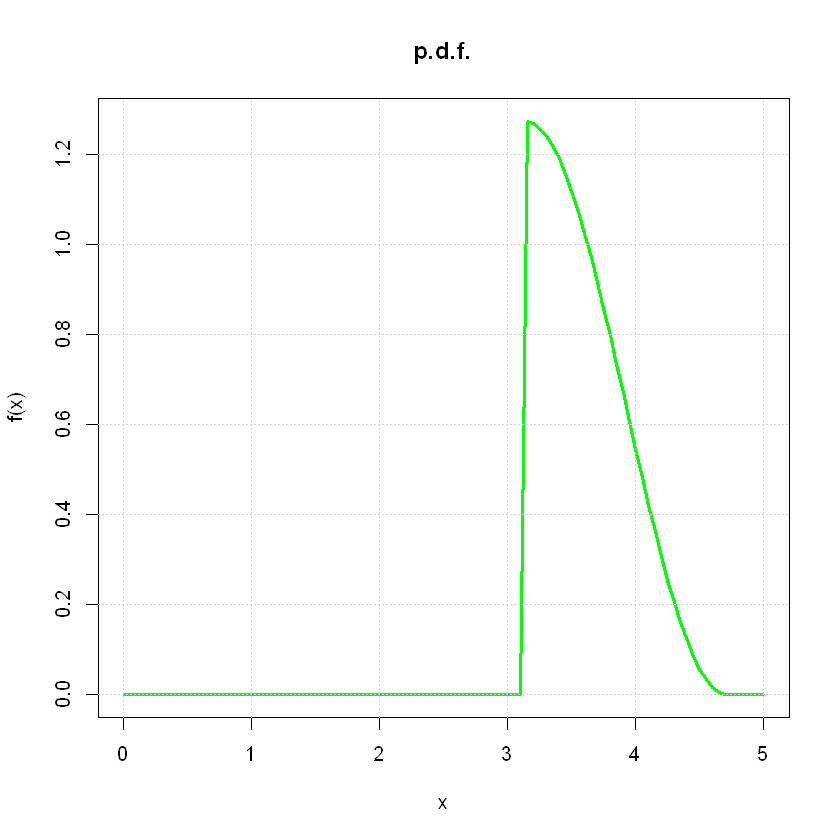

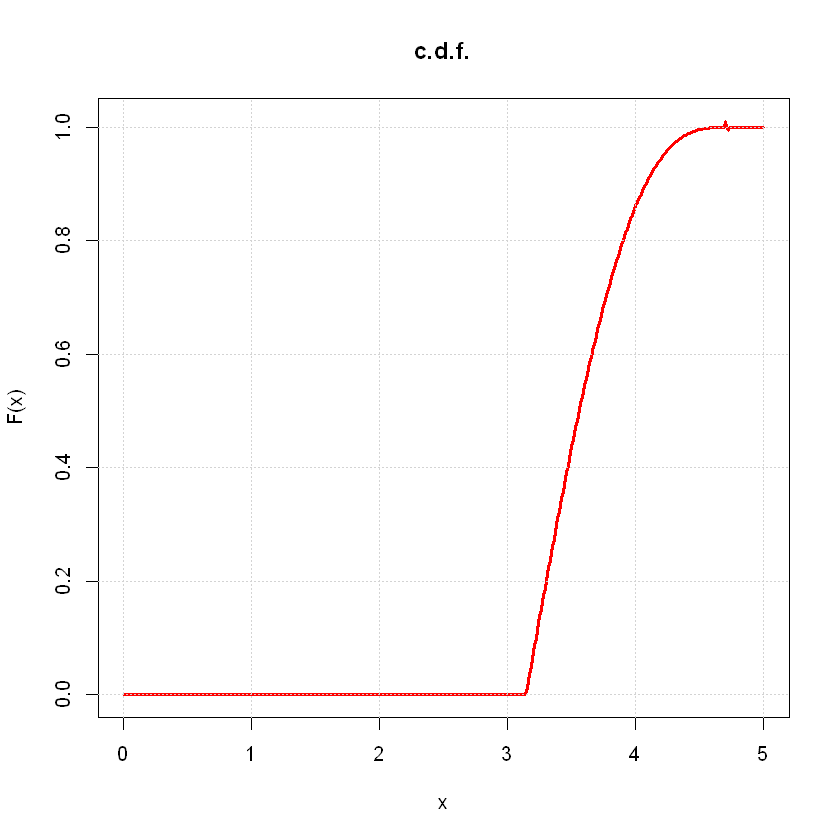

In [5]:
f<-function(x) {(x-1)*(2-x)}
c_inv<-integrate(f, lower=1, upper=2)
c<-1/(c_inv$value)
cat("Exercise 5\n")
cat("\nQuestion A\nThe constant c is equal to", c, "\n")

#evaluate the probability that the student will finish the aptitude test in more than 75 minutes 
#And that it will take 90 and 120 minutes.

pdf<-function(x) {c*(x-1)*(2-x)}
cat("\nQuestion C\nProbability that the student will finish the aptitude test in more than 75 minutes:")
1-integrate(pdf, lower=1, upper=5/4)$value
cat("\nProbability that the student will finish the aptitude test in 90 minutes:")
integrate(pdf, lower=1, upper=1.5)$value
cat("\nProbability that the student will finish the aptitude test in 120 minutes:")
1     #integrate(pdf, lower=1, upper=2)$value

cat("\nQuestion B\n")
library(tidyverse)
f1<-function(x) {ifelse(x>1&x<5, 1/(0.48*x^3), 0)}
f2<-function(x) {ifelse(x>0&x<2, (5/(8*sqrt(2)))*x^(3/2), 0)}
f3<-function(x) {ifelse(x>pi/2&x<pi, sin(x), 0)}
f4<-function(x) {ifelse(x>pi&x<(3*pi)/2, (4/pi)*(cos(x))^2, 0)}
fl<-list(f1, f2, f3, f4)

cdf<-function(f){
    F <- matrix(0, ncol=2, nrow=length(seq(0, 5, by=0.01)))
    m<-1
    for(i in seq(0, 5, by=0.01)){
       F[m,1]<-i
       F[m,2]<-integrate(f, 0, i)$value
       m<-m+1
    }
    return(F)
}

Ppdf<-function(f){
    plot(f, type="l", lwd=3, col="green", xlab="x", ylab="f(x)", main = "p.d.f.", xlim=c(0, 5))
    grid()
}
Pcdf<-function(f){
    plot(f, type="l", lwd=3, col="red", xlab="x", ylab="F(x)", main = "c.d.f.")
    grid()
}

for(i in 1:4){
    fl[[i]]%>%Ppdf()
    fl[[i]]%>%cdf()%>%Pcdf()    
}


Exercise 6

Question B
Probability that tires will last less than 15000 km: 0.6666667 

Question C
Mean value of the 3000 sampled random variables: 1.394553
Variance of the 3000 sampled random variables: 0.08068518 

Question A


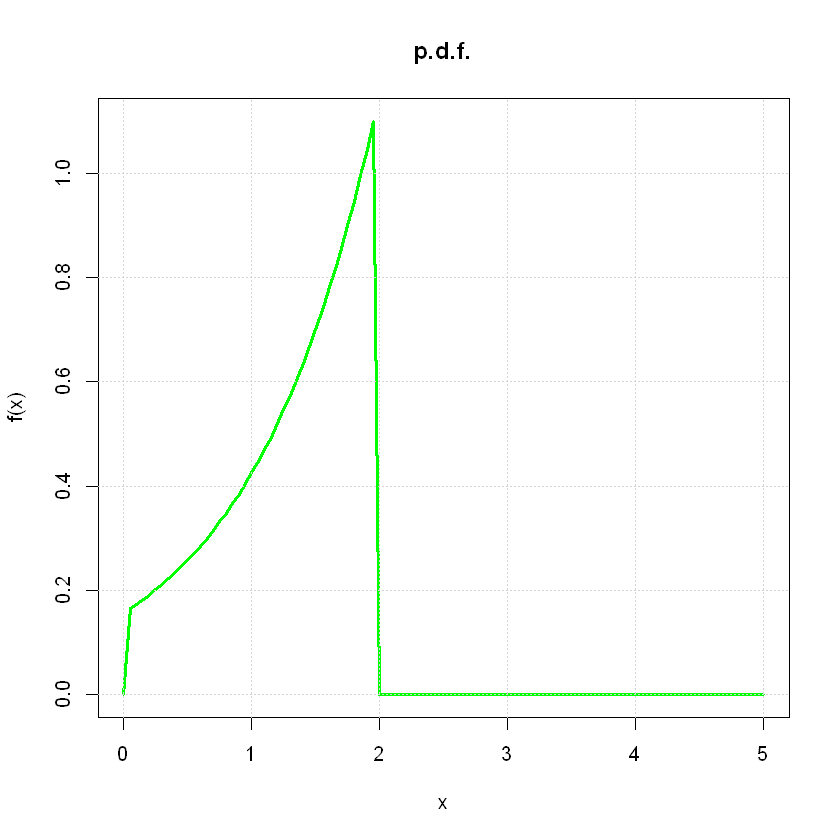

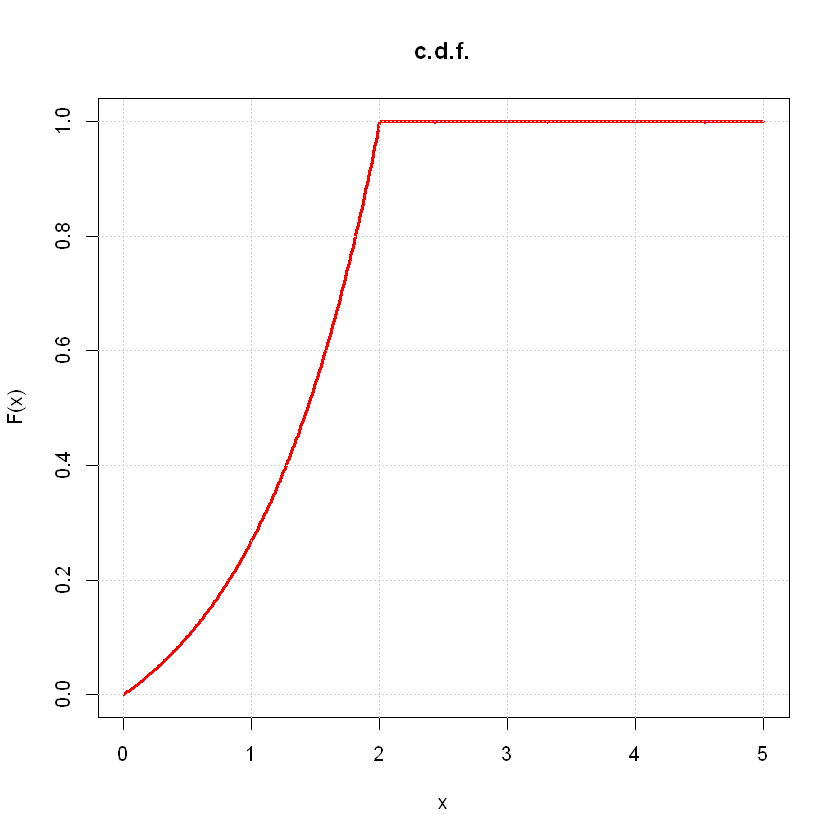

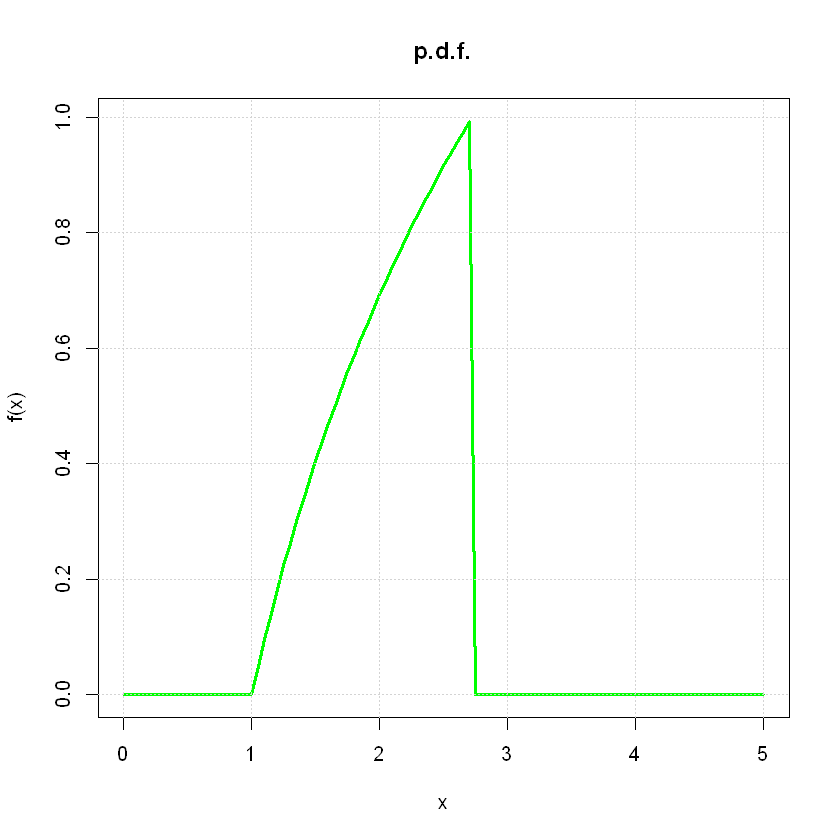

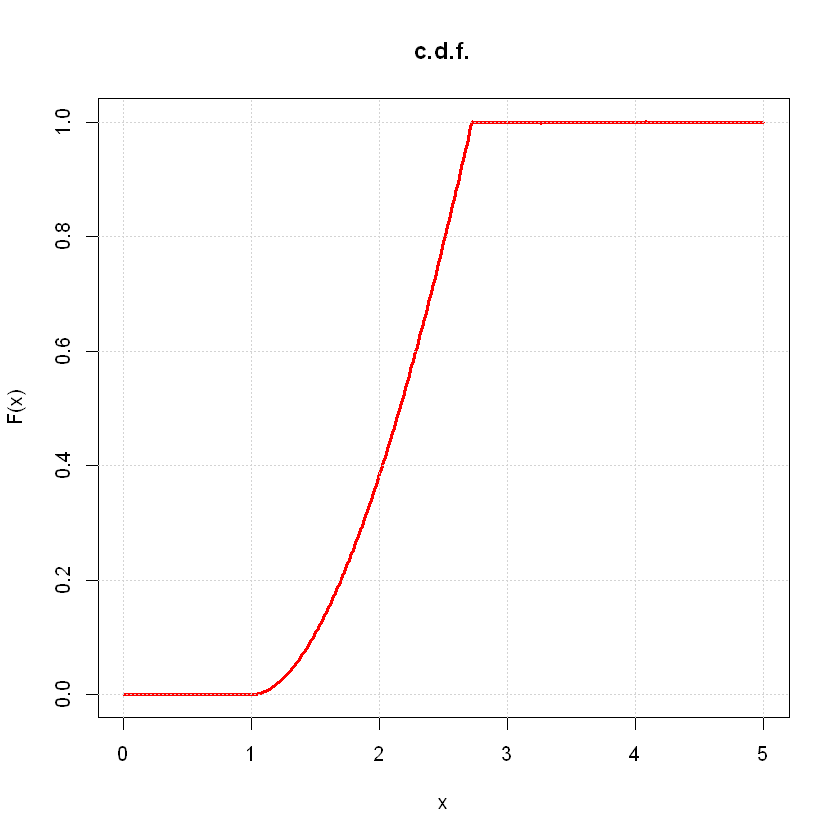

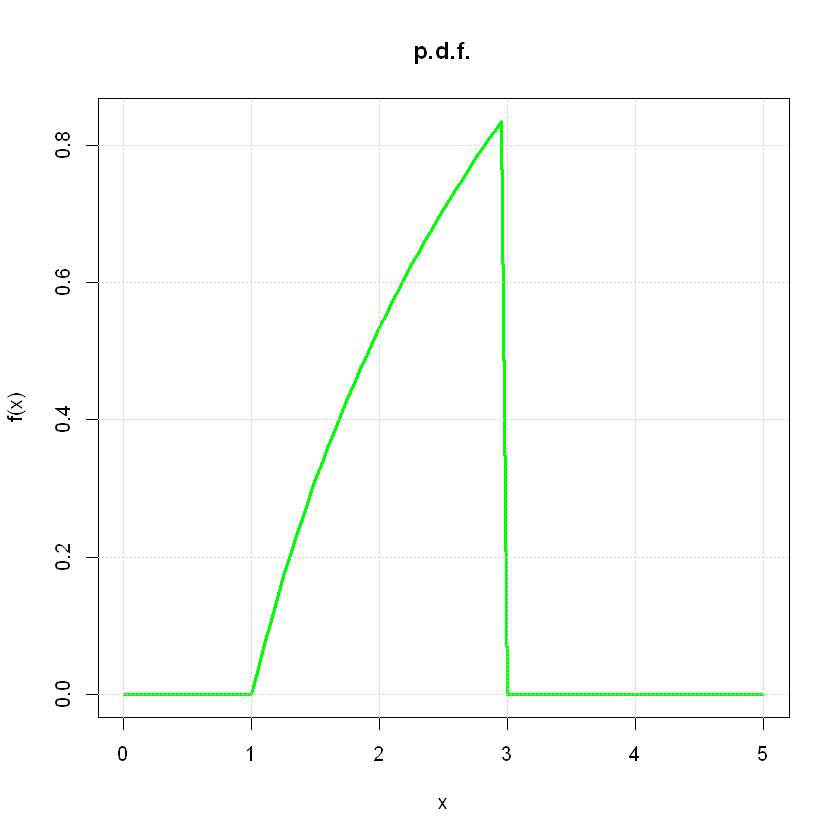

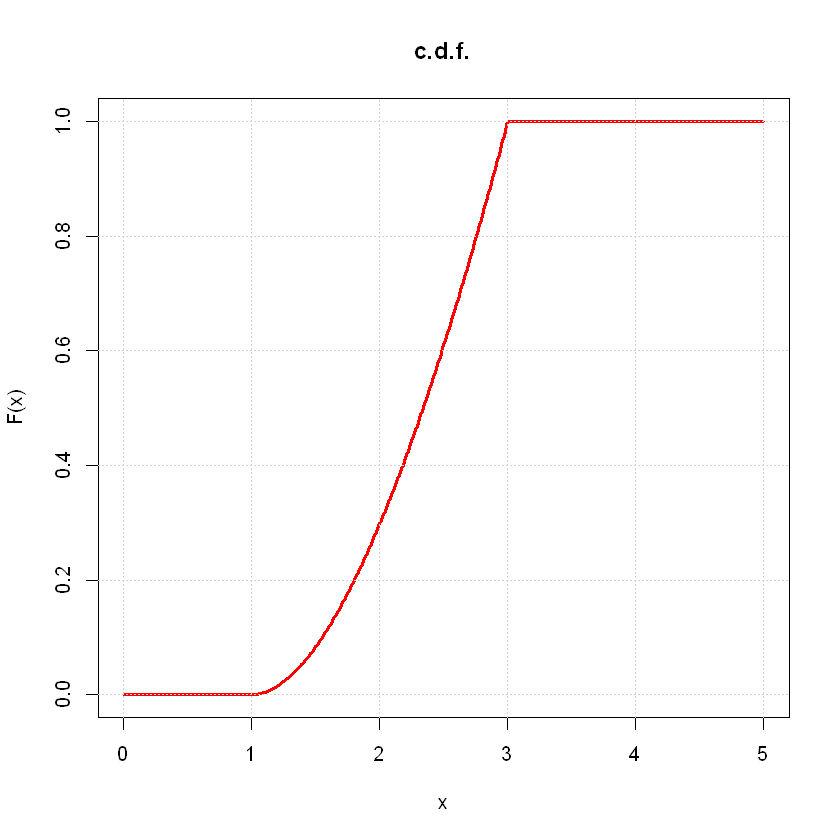

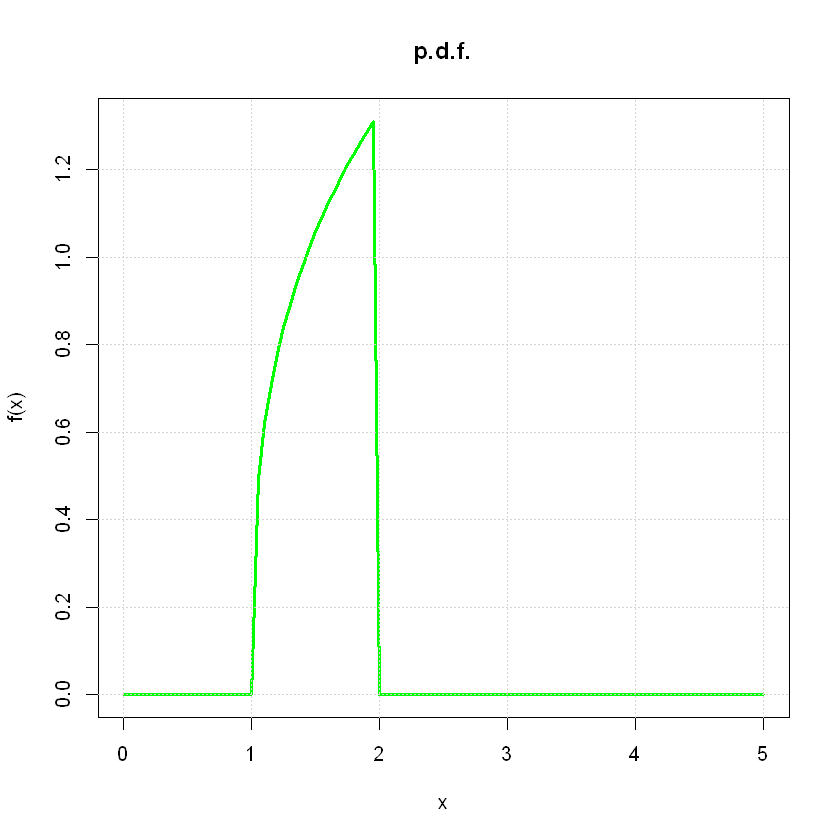

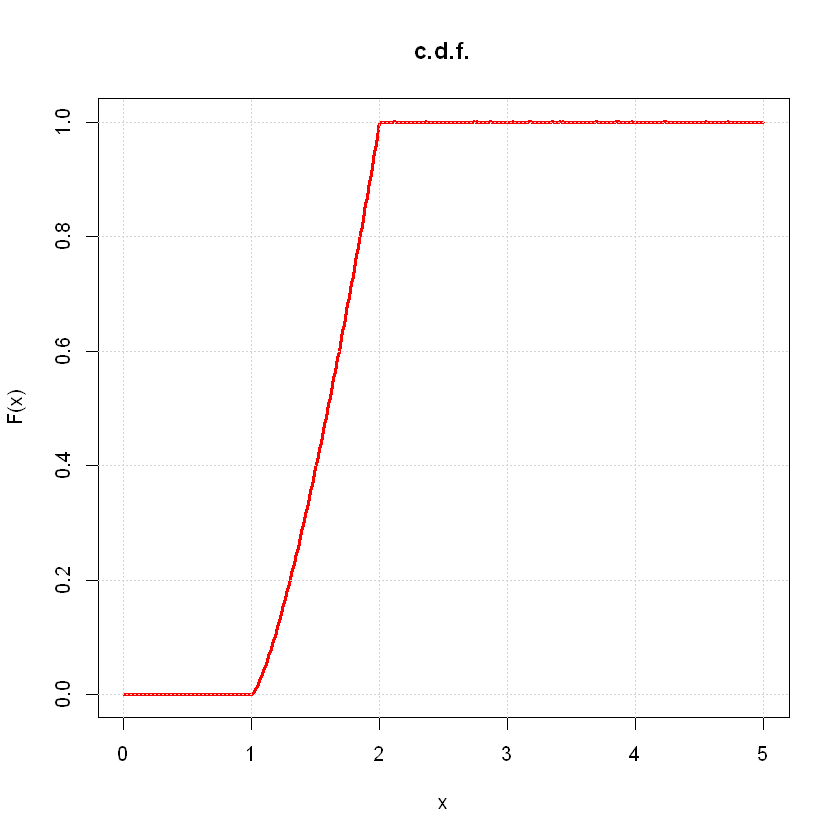

In [40]:
cat("Exercise 6\n")
pdf<-function(y) {20000/y^2}
cat("\nQuestion B\nProbability that tires will last less than 15000 km:", integrate(pdf, 10000, 15000)$value, "\n")

f<-function(x) {ifelse(x>1&x<2, 2/x^2, 0)}
F<-function(x) {ifelse(x>1&x<2, 2*(1-1/x), 0)}
sample<-function(n){
    U<-runif(n)
    rx<-2/(2-U)
    return(rx)
}
Xset<-sample(1:3000)
Var<-mean(Xset^2)-(mean(Xset))^2
cat("\nQuestion C\nMean value of the 3000 sampled random variables:", mean(Xset))
cat("\nVariance of the 3000 sampled random variables:", Var, "\n")

cat("\nQuestion A\n")

f1<-function(x) {ifelse(x>0&x<2, exp(x)/(exp(2)-1), 0)}
f2<-function(x) {ifelse(x>1&x<exp(1), log(x^2)/2, 0)}
f3<-function(x) {ifelse(x>1&x<3, log(x)/(log(27)-2), 0)}
f4<-function(x) {ifelse(x>1&x<2, (4/3)*(x-1)^(1/3), 0)}
fl<-list(f1, f2, f3, f4)

for(i in 1:4){
    fl[[i]]%>%Ppdf()
    fl[[i]]%>%cdf()%>%Pcdf()    
}